In [1]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
frequency = np.array([100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650])  # Hz
length_mm = np.linspace(40, 95, num=12, endpoint = True)  # 假设与频率相关的测量长度 (mm)
length_m = length_mm / 1000

In [13]:
X = sm.add_constant(frequency)  # 添加常数项
model = sm.OLS(length_m, X).fit() # Ordinary Least Squares
print(model)

In [4]:
predicted = model.predict(X) # 通过fit()函数得到的系数矩阵把预测值y计算出来
print(predicted) 

[0.04  0.045 0.05  0.055 0.06  0.065 0.07  0.075 0.08  0.085 0.09  0.095]


In [ ]:
# 斜率（slope）：回归模型中自变量的系数，表示x每增加1单位，y平均变化多少
slope = model.params[1]

# 截距（intercept）：当自变量为0时，因变量的预测值，即回归直线与y轴的交点
intercept = model.params[0]

# 决定系数R²：表示自变量解释了因变量多少比例的变异，越接近1拟合越好
r_squared = model.rsquared

# 调整后的R²：对R²进行调整，惩罚无意义的变量，适合多元回归模型评估
adj_r_squared = model.rsquared_adj

# 斜率对应的p值：检验斜率是否显著不为零（是否有统计学意义），通常p < 0.05说明显著
p_value = model.pvalues[1]

# 斜率的标准误差：衡量斜率估计值的精确度，越小说明估计越可靠
std_err = model.bse[1]

# F统计量：检验整个模型的显著性，衡量模型是否整体显著优于没有自变量的情况
f_stat = model.fvalue

# 样本数量：用于拟合的数据点个数
n_points = len(frequency)

# 均方根误差（RMSE）：实际观测值与预测值的误差度量，数值越小表示模型预测越准确
rmse = np.sqrt(np.mean((length_m - predicted)**2))


In [10]:
equation = f"L = {slope:.6f}·f + {intercept:.6f}"
textstr = '\n'.join([
    f"{equation}",
    f"$R^2$       = {r_squared:.6f}",
    f"Adj $R^2$   = {adj_r_squared:.6f}",
    f"p-value     = {p_value:.2e}",
    f"Std Err     = {std_err:.6f}",
    f"F-statistic = {f_stat:.2f}",
    f"n           = {n_points}",
    f"RMSE        = {rmse:.6f}"
])


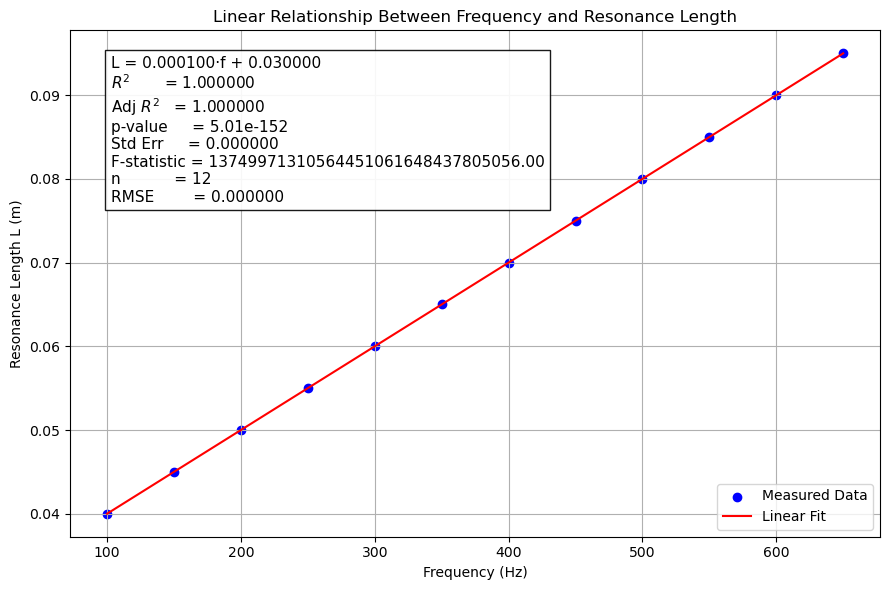

In [ ]:
# 使用 plt.text() 在图表上添加自定义文本注释
# 参数说明：
# - 前两个参数 (0.05, 0.95) 是文本的坐标位置（x, y）
# - textstr 是要显示的文本内容（需提前定义好的字符串变量）
# - transform=plt.gca().transAxes 表示使用相对坐标（0-1范围），0,0是坐标轴左下角，1,1是右上角
plt.text(
    0.05,  # x坐标：5%的位置（从左开始）
    0.95,  # y坐标：95%的位置（从下开始），即靠近顶部
    textstr,  # 要显示的文本内容
    transform=plt.gca().transAxes,  # 使用坐标轴相对坐标系
    fontsize=11,  # 字体大小设置为11磅
    verticalalignment='top',  # 文本垂直对齐方式：顶部对齐（与y坐标位置配合）
    bbox=dict(  # 为文本添加背景框
        facecolor='white',  # 背景颜色为白色
        alpha=0.9  # 背景透明度：0.9（0完全透明，1不透明）
    )
)

# 调整图表布局，防止元素重叠
# tight_layout会自动调整子图参数（如间距、边距等），
# 使所有图表元素（标题、标签、文本等）都能合理显示
plt.tight_layout()

plt.show()